# Machine Learning CW1


Submitted By:
    Swarupa Paul 
    StudentNumber: 33746072
    
    "I worked and submitted alone"
  I have implemented Linear Regression, Lasso Regression, Ridge Regression,Polynomial Regression and Elastic Net Regression.

# Content 

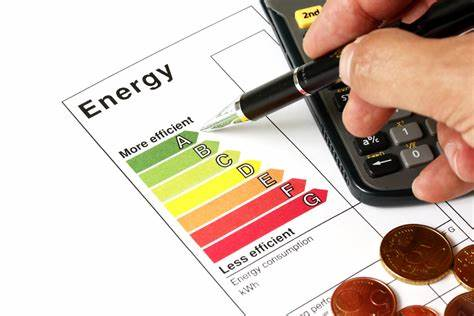

Dataset description:
    
    This dataset appears to be related to predicting the heating load of buildings based on various features such as building category, compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution.
    
    Here is a brief explanation of each feature:
    1.X0: Category of the building - This feature represents the category or type of the building, which could be residential, commercial, or industrial, for example. 
    2.X1: Relative Compactness - This feature represents the compactness of the building, which is the ratio of the internal volume of the building to its external surface area. 
    3.X2: Surface Area - This feature represents the total surface area of the building. 
    4.X3: Wall Area - This feature represents the total wall area of the building. 
    5.X4: Roof Area - This feature represents the total roof area of the building. 
    6.X5: Overall Height - This feature represents the overall height of the building.
    7.X6: Orientation - This feature represents the orientation of the building, which could be North, East, South, or West. 
    8.X7: Glazing Area - This feature represents the total glazing area of the building, which includes windows, doors, etc. 
    9.X8: Glazing Area Distribution - This feature represents the distribution of glazing area in the building. 
    10.Y: Heating Load - This is the outcome variable that needs to be predicted. It represents the heating load required to maintain a comfortable temperature inside the building. 
    The dataset also contains missing values, which may need to be handled appropriately during data pre-processing. Depending on the specific task and the model being used, different feature engineering techniques and machine learning algorithms may be applied to this dataset for prediction of heating load.
    

# Import the Dependencies

In [1]:
# Common imports
import numpy as np
import os
from sklearn import preprocessing
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#Function that would save figures to the folder containing the notebook
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

 I have utilized word cloud in my project as a visual representation of the frequency of words in the data. The purpose of this is to allow anyone to easily understand the main themes and topics covered in the project by simply viewing the image of the word cloud

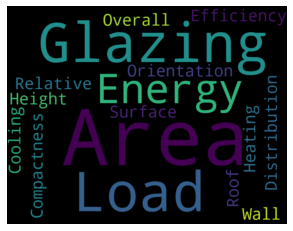

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
text=("Energy Efficiency Relative Compactness Surface Area Wall Area Roof Area Overall Height Orientation Glazing Area Glazing Area Distribution Heating Load Cooling Load")
 
wordcloud = WordCloud(width=900, height=700, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Prepare the Data

Data from the csv file will be saved to a variable which will be formed into the shape that the variable will have

In [3]:
#Reads the csv file that contains the dataset
energy = pd.read_csv('datcw_na.csv')
energy.shape

(768, 10)

# In this study, 70% of the data were from the training set and 30% from the testing set

In [4]:
#The output of this notebook will be the same regardless of how many times it is run
np.random.seed(42)

In [5]:
#The data is partitioned into training and test sets
from sklearn.model_selection import train_test_split

# Split the data into a 70% training set and a 30% test set
train_set, test_set = train_test_split(energy, test_size=0.3, random_state=42)

In [6]:
#provides data details.
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [7]:
# notice that X0 which falls under category of the building is the only nominal/categorical variable, with the following counts on its values
energy["X0"].value_counts()

C2    265
C3    260
C1    243
Name: X0, dtype: int64

In [8]:
#calculates the number of missing values for each variable in the 'energy' dataset.
energy.isnull().sum()


X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

# Inspection and visualization of data 

In [9]:
#This command prints five of the first columns from the CSV file that contain the data from the CSV file
energy.head()

X0    X1      X2      X3      X4    X5    X6   X7   X8      Y
0  C3  1.19  622.55     NaN   89.31  7.00  1.98  0.0  0.0  15.55
1  C1  1.19  622.55  323.40  109.15  7.70  3.00  0.0  0.0  15.55
2  C1  0.88  463.05  291.06   99.23  5.67  4.40  0.0  0.0  15.55
3  C2  0.79  509.36  291.06  121.28  6.30  4.05  0.0  0.0  15.55
4  C1  0.89  507.15  385.39  121.28  7.70  2.00  0.0  0.0  20.84

In [10]:
#Returns the count,mean,std,min,25%,50%,75%,max for each feature excluding x0
energy.describe()

X1          X2          X3          X4          X5          X6  \
count  768.000000  768.000000  728.000000  768.000000  768.000000  768.000000   
mean     0.763516  666.768997  321.102527  176.564141    5.229766    3.527331   
std      0.147093  120.863329   60.479340   51.280618    1.844813    1.245710   
min      0.500000  416.740000  198.450000   89.310000    2.840000    1.620000   
25%      0.650000  575.510000  277.830000  132.300000    3.470000    2.427500   
50%      0.750000  661.500000  315.320000  178.235000    4.955000    3.600000   
75%      0.860000  741.130000  355.740000  218.300000    6.930000    4.425000   
max      1.190000  978.290000  503.970000  266.800000    8.470000    6.050000   

               X7          X8           Y  
count  768.000000  768.000000  768.000000  
mean     0.237852    2.803737   22.307201  
std      0.139736    1.597817   10.090196  
min      0.000000    0.000000    6.010000  
25%      0.100000    1.517500   12.992500  
50%      0.240000    2.970000   18.950000  
75%      0.360000    3.960000   31.667500  
max      0.480000    6.050000   43.100000

In [11]:
#energyvar = energy

In [12]:
#returns the unique values in the 'X0' column of the 'energy' dataset.
energy["X0"].unique()

array(['C3', 'C1', 'C2'], dtype=object)

In [13]:
#energy["X0"] = energy["X0"].replace({"C1": 1, "C2": 2, "C3": 3})


# Train_Set Analysis

In [14]:
#Shows the training set data

train_set

X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
334  C3  0.61  800.42  363.82  242.55  2.84  3.96  0.24  0.99  15.08
139  C3  0.63  705.60  339.57  198.45  3.85  6.05  0.10  1.98  15.19
485  C2  0.99  557.86  315.32  110.25  6.30  3.30  0.28  5.00  32.31
547  C1  0.71  630.63  339.57  119.07  7.70  6.05  0.36  0.99  41.67
18   C2  0.71  630.63  377.30  119.07  5.67  3.60  0.00  0.00  29.63
..   ..   ...     ...     ...     ...   ...   ...   ...   ...    ...
71   C2  0.75  654.89  416.50  121.28  8.47  4.05  0.09  0.90  32.21
106  C2  1.04  582.12  291.06  161.70  7.70  3.96  0.09  2.42  26.33
270  C2  0.86  575.51  326.10  242.55  3.47  4.84  0.12  6.05  10.67
435  C2  0.97  509.36  355.74  109.15  6.93  6.05  0.31  3.24  28.62
102  C3  0.99  557.86  257.98  110.25  6.30  3.96  0.08  2.20  28.83

[537 rows x 10 columns]

In [15]:
#calculates the number of missing values for each variable in the 'train_set' dataset
train_set.isnull().sum()


X0     0
X1     0
X2     0
X3    26
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

In [16]:
#Shows the testing set data

#test_set

In [17]:
#displays the first five rows of the 'train_set' dataset
train_set.head()

X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
334  C3  0.61  800.42  363.82  242.55  2.84  3.96  0.24  0.99  15.08
139  C3  0.63  705.60  339.57  198.45  3.85  6.05  0.10  1.98  15.19
485  C2  0.99  557.86  315.32  110.25  6.30  3.30  0.28  5.00  32.31
547  C1  0.71  630.63  339.57  119.07  7.70  6.05  0.36  0.99  41.67
18   C2  0.71  630.63  377.30  119.07  5.67  3.60  0.00  0.00  29.63

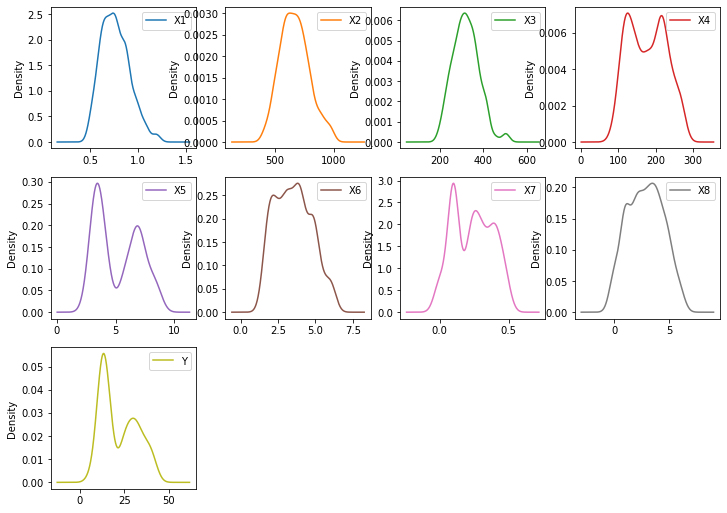

In [18]:
#densityPlot for train set
train_set.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

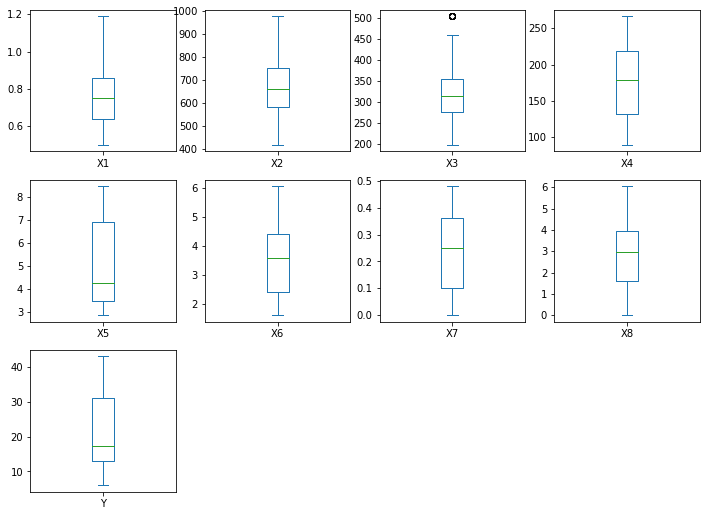

In [19]:
#boxplot for train set
train_set.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));


Generating histograms for the characteristics that holds the training set data for each feature in the dataset

C:\Users\Swaru\AppData\Local\Temp\ipykernel_51096\3466954356.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set.hist(bins=50, ax=ax)


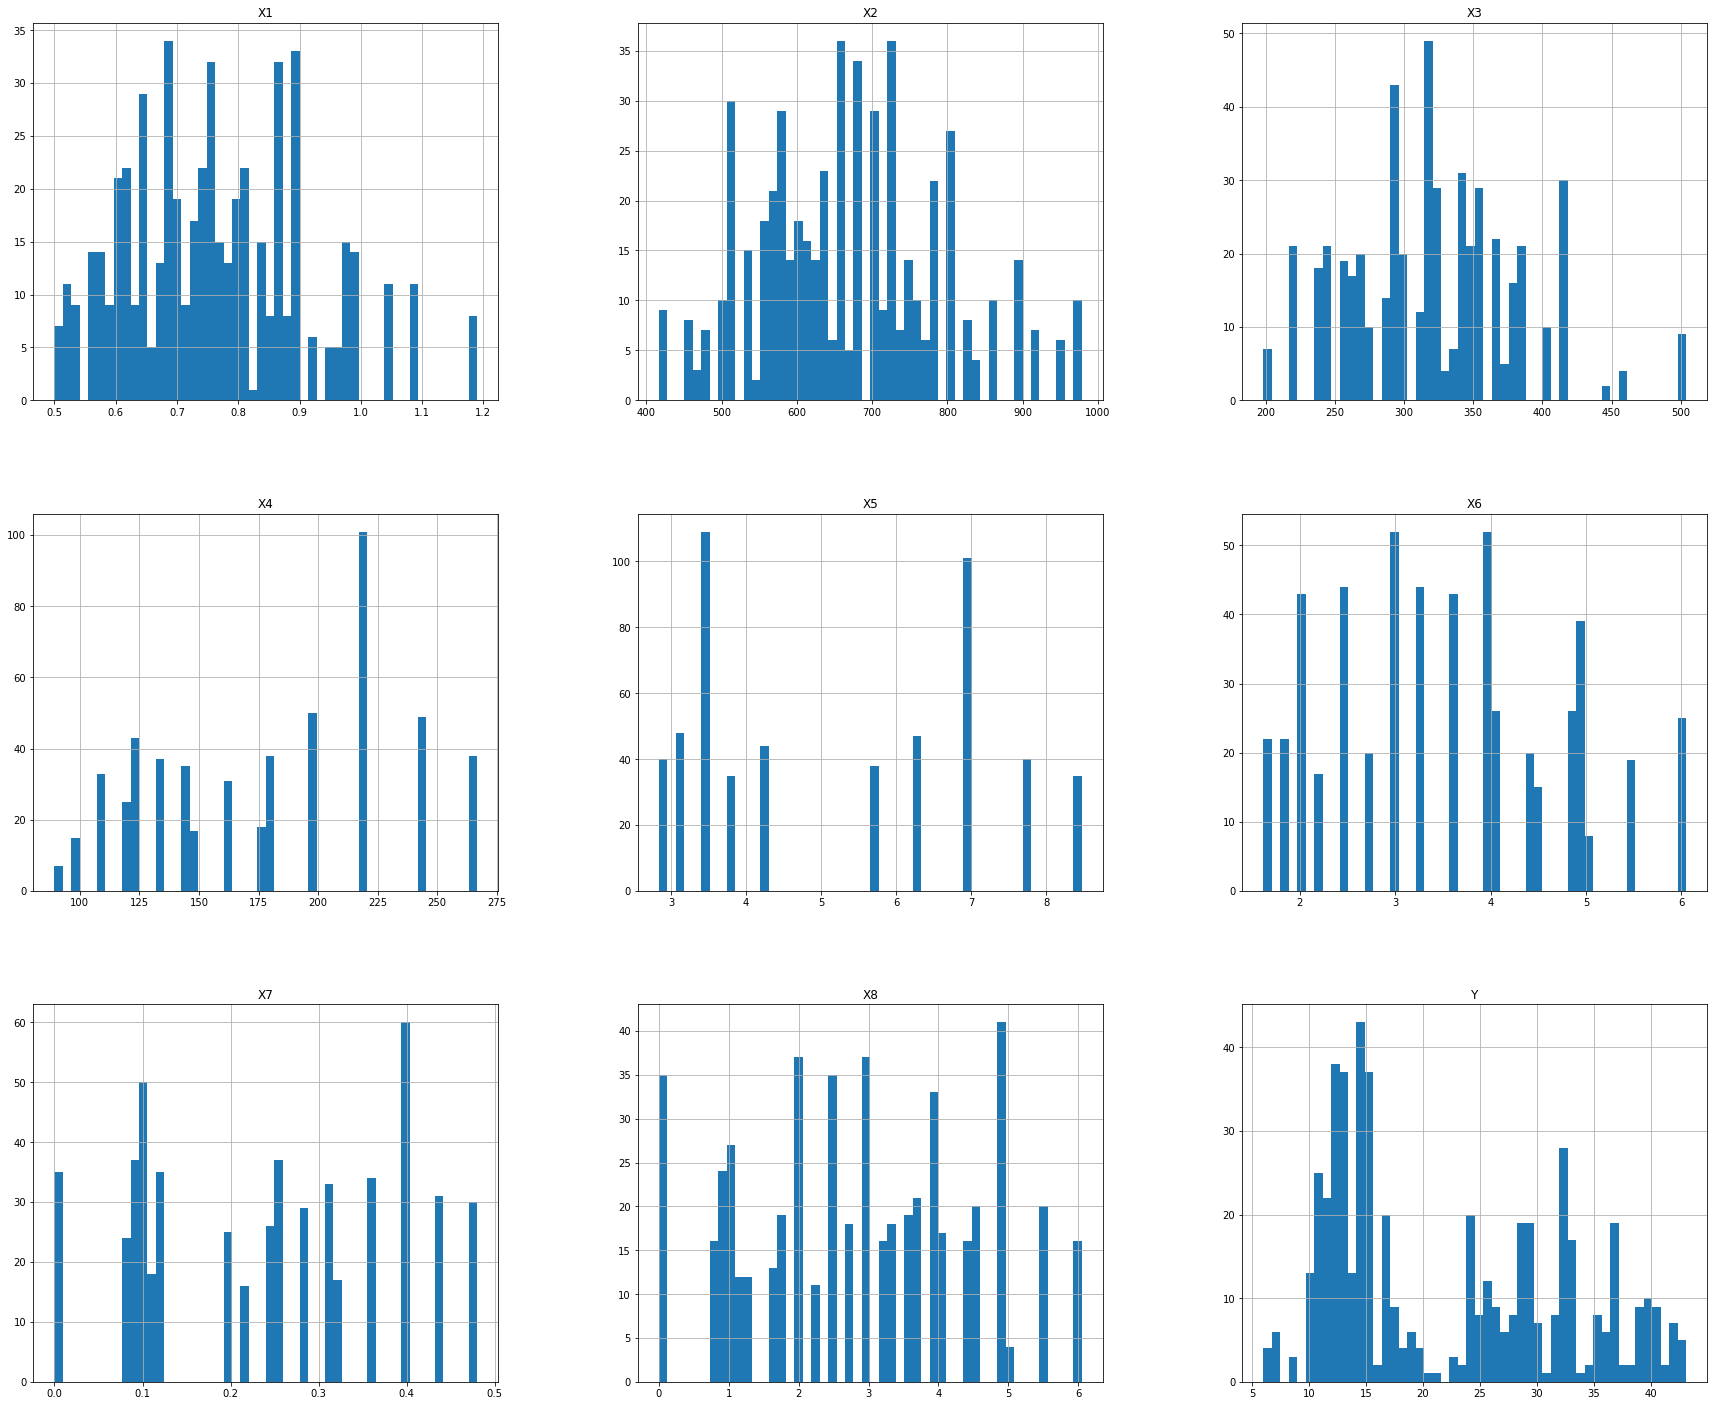

In [20]:
#The code creates a histogram plot of a train set and saves it as an image file.
fig, ax = plt.subplots(figsize=(30,25))
train_set.hist(bins=50, ax=ax)
plt.savefig("Histogram plots")
plt.show()

In [21]:
#code imports the Plotly Express library with the alias px.import plotly.express as px
import plotly.express as px

#Surface Area Vs Wall Area
fig = px.density_heatmap(train_set, x="Y", y="X5", marginal_x="box", marginal_y="violin", title = "Heating Load Vs overall height")
fig.show()

The results show that Heating Load is generally positively correlated with the entire dataset when it comes to heating load.

# Finding the Correlations

In [22]:
#The code computes the correlation matrix of the train_set DataFrame
corr_relations = train_set.corr()
corr_relations["Y"].sort_values(ascending=False)

Y     1.000000
X5    0.809140
X1    0.444701
X3    0.308799
X7    0.273489
X8    0.076206
X6    0.021983
X2   -0.499603
X4   -0.774212
Name: Y, dtype: float64

# Visualising the correlations of the training set data for each feature in the dataset

This below code generates a pairplot using the Seaborn library for each feature in the training dataset, with histograms shown along the diagonal, and sets the plot title and axis labels before displaying the plot.

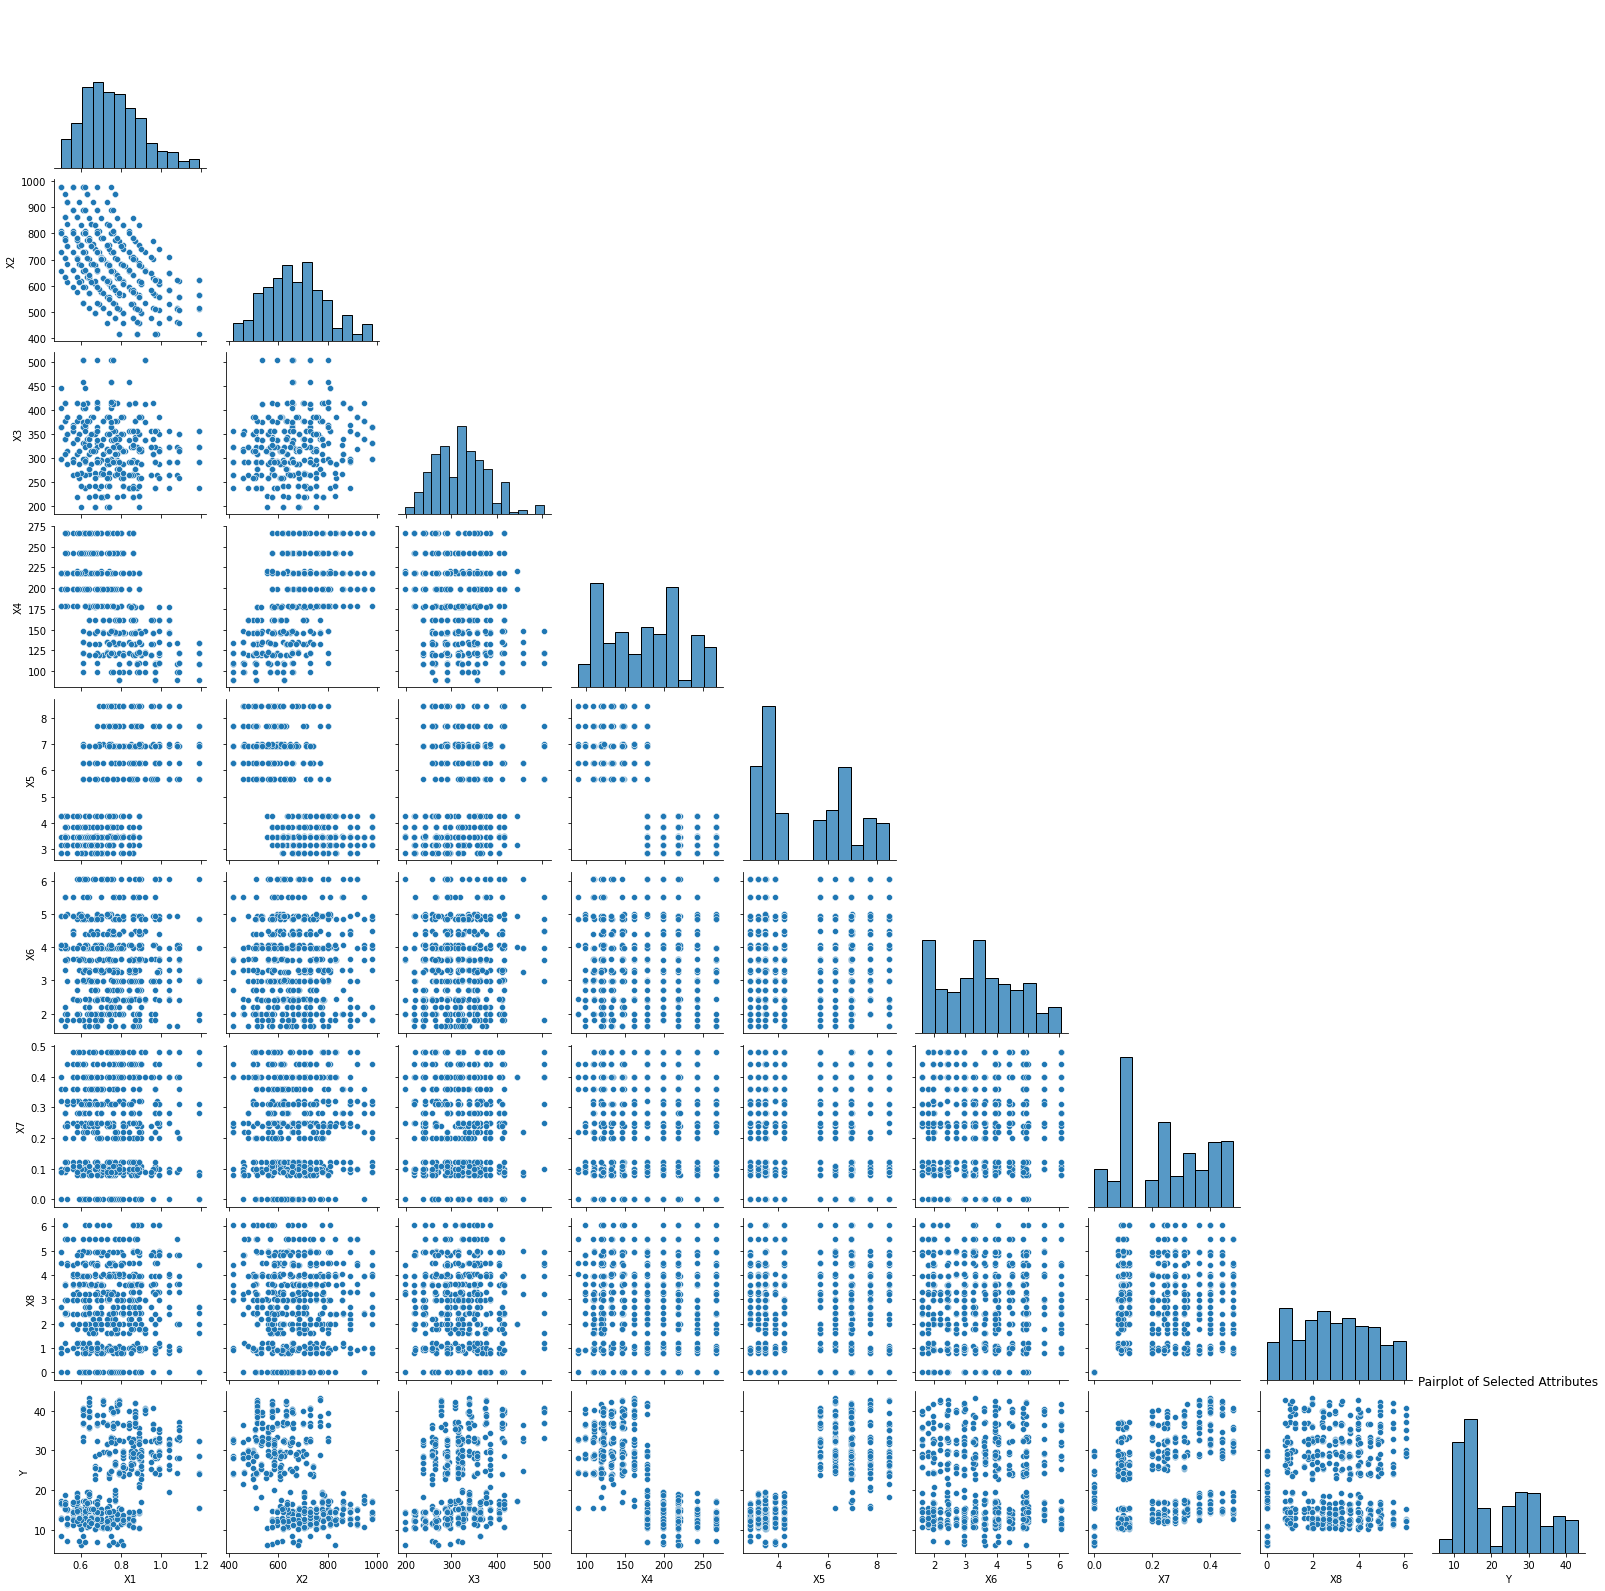

In [23]:
import seaborn as sns
# Define a list of attribute names to plot
attributes = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y']

# Create a pairplot using Seaborn
sns.pairplot(train_set[attributes], diag_kind='hist', corner=True)

# Set the title and axis labels
plt.title('Pairplot of Selected Attributes')
plt.xlabel('Attribute Values')
plt.ylabel('Attribute Values')
#save_fig("scatter_matrix_plot")
# Show the plot
plt.show()

# In addition to data cleaning and pre-processing, data transformation is also necessary



# Data Cleaning

In [24]:
#The code returns the first few rows of the train_set DataFrame that have missing values in any column.
train_set[train_set.isnull().any(axis=1)].head()


X0    X1      X2  X3      X4    X5    X6    X7    X8      Y
333  C1  0.68  727.65 NaN  242.55  3.47  2.70  0.20  0.99  15.12
417  C1  0.84  727.65 NaN  266.80  3.85  2.97  0.25  3.63  12.46
453  C1  0.76  595.35 NaN   99.23  8.47  2.97  0.25  3.24  36.45
88   C2  0.64  776.16 NaN  242.55  3.85  1.80  0.10  1.10  15.41
0    C3  1.19  622.55 NaN   89.31  7.00  1.98  0.00  0.00  15.55

In [25]:
#The code returns the first few rows of the energy_var DataFrame that have missing values in any column.
energy_var = energy[energy.isnull().any(axis=1)].head()
energy_var

X0    X1      X2  X3      X4    X5    X6    X7    X8      Y
0    C3  1.19  622.55 NaN   89.31  7.00  1.98  0.00  0.00  15.55
34   C1  0.68  661.50 NaN  178.60  3.47  4.40  0.00  0.00   6.77
88   C2  0.64  776.16 NaN  242.55  3.85  1.80  0.10  1.10  15.41
121  C3  0.73  617.40 NaN  218.30  3.47  2.43  0.09  2.00  10.46
168  C1  0.67  754.60 NaN  242.55  3.47  1.98  0.11  2.43  10.39

In [26]:
#The code removes the "Y" and "X0" columns from the train_set DataFrame and saves the resulting DataFrame as train_set_num1
train_set_num1= train_set.drop(['Y','X0'], axis = 1)


# Transformation Pipelines


The SimpleImputer function is used to impute missing values in the numerical data with the median value of the column, and the StandardScaler function is used to standardize the data so that it has zero mean and unit variance. The fit_transform method of the Pipeline object is then used to fit the pipeline to the data and transform it in a single step.

In [27]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define a pipeline for numerical data
num_pipeline = Pipeline([
    # Impute missing values with the median
    ('imputer', SimpleImputer(strategy="median")),
    # Scale the data using StandardScaler
    ('std_scaler', StandardScaler()),
])

# Fit and transform the numerical data in train_set_num1 using the pipeline
train_num_tr = num_pipeline.fit_transform(train_set_num1)


The below code uses the ColumnTransformer class to apply different transformations to numerical and categorical data. The num_pipeline is applied to the numerical attributes and OneHotEncoder is applied to the categorical attribute "X0". The resulting transformed data is then stored in train_prepared DataFrame.

In [28]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Get the list of numerical attributes
num_attribs = list(train_set_num1)

# Get the list of categorical attributes
cat_attribs = ["X0"]

# Define a full pipeline that applies different transformations to numerical and categorical data
full_pipeline = ColumnTransformer([
        # Apply the num_pipeline to numerical attributes
        ("num", num_pipeline, num_attribs),
        # Apply OneHotEncoder to categorical attributes
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Fit and transform the entire train_set using the full pipeline
train_prepared = pd.DataFrame(full_pipeline.fit_transform(train_set))
train_prepared


0         1         2         3         4         5         6   \
0   -1.034431  1.070996  0.748482  1.290728 -1.261059  0.357491  0.004901   
1   -0.898148  0.295342  0.334972  0.411686 -0.716738  2.086303 -0.991026   
2    1.554945 -0.913212 -0.078537 -1.346397  0.603643 -0.188450  0.289452   
3   -0.353016 -0.317933  0.334972 -1.170588  1.358147  2.086303  0.858554   
4   -0.353016 -0.317933  0.978342 -1.170588  0.264116  0.059705 -1.702404   
..        ...       ...       ...       ...       ...       ...       ...   
532 -0.080450 -0.119480  1.646778 -1.126537  1.773124  0.431937 -1.062164   
533  1.895653 -0.714758 -0.492217 -0.320848  1.358147  0.357491 -1.062164   
534  0.669106 -0.768830  0.105283  1.290728 -0.921532  1.085412 -0.848751   
535  1.418662 -1.309955  0.610702 -1.368323  0.943170  2.086303  0.502865   
536  1.554945 -0.913212 -1.056295 -1.346397  0.603643  0.357491 -1.133302   

           7    8    9    10  
0   -1.163279  0.0  0.0  1.0  
1   -0.543481  0.0  0.0  1.0  
2    1.347214  0.0  1.0  0.0  
3   -1.163279  1.0  0.0  0.0  
4   -1.783076  0.0  1.0  0.0  
..        ...  ...  ...  ...  
532 -1.219624  0.0  1.0  0.0  
533 -0.268016  0.0  1.0  0.0  
534  2.004575  0.0  1.0  0.0  
535  0.245352  0.0  1.0  0.0  
536 -0.405749  0.0  0.0  1.0  

[537 rows x 11 columns]

The below code assigns the transformed data (i.e., train_prepared DataFrame) to the predictors variable, and assigns the target variable to the 'Y' column of the original train_set DataFrame. The resulting target variable is then displayed.

In [29]:
# Assign the transformed data to the predictors variable
predictors = train_prepared

# Assign the target variable to the 'Y' column of the train_set DataFrame
target = train_set['Y']

# Display the target variable
target


334    15.08
139    15.19
485    32.31
547    41.67
18     29.63
       ...  
71     32.21
106    26.33
270    10.67
435    28.62
102    28.83
Name: Y, Length: 537, dtype: float64

# Models

# Linear Regression on Train Dataset

The code imports necessary libraries and creates an instance of the LinearRegression class called model_lr. The fit method of the model is then used to fit the model to the predictors (i.e., the transformed data) and target variables

In [30]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create an instance of the LinearRegression class
model_lr = LinearRegression()

# Fit the model to the predictors and target variables
model_lr.fit(predictors, target)


LinearRegression()

The code creates an instance of the LinearRegression class and fits it to the predictors (i.e., the transformed data) and target variables in one line of code. The resulting model is stored in the model_lr variable.

In [31]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model instance and fit it to the predictors and target variables
model_lr = LinearRegression().fit(predictors, target)


The below code prints out the intercept and coefficients (slopes) of the linear regression model. The intercept represents the predicted value of the target variable when all predictor variables are equal to zero. The coefficients represent the change in the target variable for each unit increase in the corresponding predictor variable, holding all other variables constant.

In [32]:
# Print the intercept of the linear regression model
print(f"intercept: {model_lr.intercept_}")

# Print the coefficients (slopes) of the linear regression model for each predictor variable
print(f"slope: {model_lr.coef_}")


intercept: 22.038781278048223
slope: [-0.32358585 -0.72300508  1.70205429 -2.6715536   5.54359917 -0.2170281
  2.74328858  0.22146329 -0.30117229 -0.02084676  0.32201905]


# Cross Validation Optimizer for Linear Regression

The below code uses cross-validation to evaluate the performance of the linear regression model. Specifically, it uses the cross_val_score function to fit the model to the data with 5-fold cross-validation and compute the negative mean squared error for each fold. The negative mean squared error is then converted to the root mean squared error (RMSE) and averaged across all folds to get an estimate of the model's performance. The average RMSE is then printed to the console. The RMSE is a measure of the difference between the predicted values and the actual values, with lower values indicating better performance.

In [33]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
import math

# Create Linear Regression model object with 5 cross-validation folds
lin_scores = cross_val_score(model_lr, predictors, target,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=5)

# Calculate the rmse scores for linear regression model
lin_rmse_scores = np.sqrt(-lin_scores)

# Calculate the mean rmse score for the linear regression model
lin_rmse_mean = np.mean(lin_rmse_scores)

# Print the average root mean squared error (RMSE) for the linear regression model
print("Average RMSE: {:.2f}".format(lin_rmse_mean))


Average RMSE: 4.62


The below code creates a scatter plot with actual target values on the x-axis and predicted target values on the y-axis. The scatter plot is created using seaborn library. The predicted values are obtained using the Linear Regression model trained earlier. The code also adds a black dashed line to represent a perfect prediction where actual and predicted values are equal.

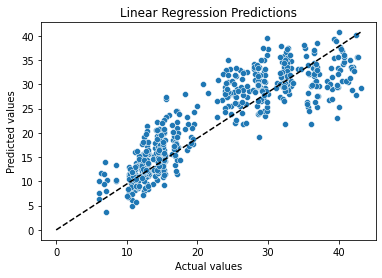

In [34]:
import seaborn as sns

# Predict target values
predicted = model_lr.predict(predictors)

# Create scatter plot of predicted vs actual values
sns.scatterplot(x=target, y=predicted)
plt.plot([0, np.max(target)], [0, np.max(predicted)], 'k--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Predictions')
plt.show()


# Lasso Regression

The below code creates an instance of the Lasso model from scikit-learn library, and fits the model to the predictors and target data. Lasso is a linear regression model that adds a regularization term to the cost function. The regularization term helps to prevent overfitting by shrinking the coefficients of the input features towards zero. The alpha parameter is the regularization strength and it is set to the default value of 1.0. The printed output shows the default values of the other hyperparameters of the Lasso model.

In [35]:
# Import necessary libraries
from sklearn.linear_model import Lasso
 
# Create an instance of the Lasso model
model_ls = Lasso()

# Fit the Lasso model to the training data
model_ls.fit(predictors, target)

# Print the Lasso model object
print(model_ls)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

Lasso()


Lasso(normalize=False)

In [36]:
#model_ls = Lasso().fit(predictors, target)

In [37]:
# Print the intercept of the lasso regression model

print(f"intercept: {model_ls.intercept_}")

# Print the coefficients (slopes) of the lasso regression model
print(f"slope: {model_ls.coef_}")

intercept: 22.05050279329609
slope: [ 0.         -0.          0.72963441 -2.56726707  4.98914481 -0.
  1.7724035   0.         -0.         -0.          0.        ]


In [38]:
#from sklearn.linear_model import Lasso
#lasso_reg = Lasso(param_grid, cv=5)

# Optimized Lasso Regression model with GridSearchCV for Train Dataset

This code performs hyperparameter tuning using GridSearchCV to find the best hyperparameters for Lasso regression. It defines the parameter grid to search, creates a Lasso object, and a GridSearchCV object to find the best parameter combination using 5-fold cross-validation. The fit method is called on the GridSearchCV object to fit the Lasso regression model to the data and perform hyperparameter tuning. The best parameter combination found is printed along with the mean cross-validated score of the best estimator.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the parameter grid to search
param_grid = {'alpha': np.logspace(-4, 4, 9)}
#lasso_reg = Lasso()


# Create a GridSearchCV object to find the best parameter combination
lsgrid_search = GridSearchCV(model_ls, param_grid, cv=5)

# Fit the GridSearchCV object to the data
lsgrid_search.fit(predictors, target)

# Print the best parameter combination found
print("Best Parameter: ", lsgrid_search.best_params_)

# Print the mean cross-validated score of the best estimator
print("Best Score: ", lsgrid_search.best_score_)


Best Parameter:  {'alpha': 0.001}
Best Score:  0.786338044668948


The below code creates a scatter plot with actual target values on the x-axis and predicted target values on the y-axis. The scatter plot is created using seaborn library. The predicted values are obtained using the Lasso Regression model trained earlier. The code also adds a black dashed line to represent a perfect prediction where actual and predicted values are equal.

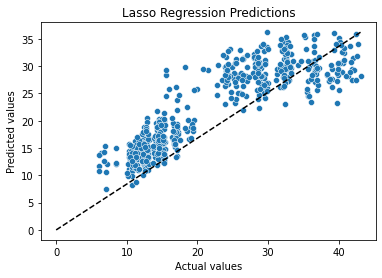

In [40]:
import seaborn as sns

# Predict target values
predicted = model_ls.predict(predictors)

# Create scatter plot of predicted vs actual values
sns.scatterplot(x=target, y=predicted)
plt.plot([0, np.max(target)], [0, np.max(predicted)], 'k--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Lasso Regression Predictions')
plt.show()


# Ridge Regression

The Ridge class creates a Ridge Regression model object with a regularization parameter (alpha) of 3 and the Cholesky solver algorithm. The alpha parameter controls the strength of the regularization, with higher values leading to stronger regularization.

The solver parameter in Ridge specifies the algorithm to use for solving the optimization problem. The cholesky solver uses the Cholesky decomposition method for matrix factorization.

The fit method of the Ridge class fits the model to the data, where predictors are the independent variables and target is the dependent variable.

In [41]:
# Import Ridge and RidgeCV classes from linear_model module of scikit-learn library
from sklearn.linear_model import Ridge, RidgeCV

# Create a Ridge Regression model object with a regularization parameter (alpha) of 3 and Cholesky solver
model_ri = Ridge(alpha=3, solver="cholesky")

# Fit the model to the predictors (independent variables) and target (dependent variable)
model_ri.fit(predictors, target)


Ridge(alpha=3, solver='cholesky')

In [42]:
#model_ri = Ridge().fit(predictors, target)

In [43]:
# Print the intercept of the Ridge regression model
print(f"intercept: {model_ri.intercept_}")

# Print the coefficients (slopes) of the Ridge regression model
print(f"slope: {model_ri.coef_}")

intercept: 22.038958773289092
slope: [-0.29965157 -0.73607712  1.70454442 -2.6904145   5.47541429 -0.21349988
  2.72629283  0.22320335 -0.29588488 -0.02164932  0.3175342 ]


# Optimized Ridge Regression model with GridSearchCV for Train Dataset

The purpose of this code is to perform a grid search to find the best hyperparameters for the Ridge Regression model.

The param_grid dictionary specifies the values of the hyperparameter alpha to be searched over. The np.logspace function is used to generate a sequence of 9 values of alpha, ranging from 10^-4 to 10^4 on a logarithmic scale.

A Ridge Regression model object is created with default hyperparameters. A GridSearchCV object is created with the Ridge Regression model object, the parameter grid, and 20 cross-validation folds. The GridSearchCV object is then fit to the data using the fit method, which searches over the hyperparameter grid and performs cross-validation to evaluate the performance of each combination of hyperparameters.

The best parameter combination found by the GridSearchCV object is printed using the best_params_ attribute.The mean cross-validated score of the best estimator found by the GridSearchCV object is printed using the best_score_ attribute. 

In [44]:
# Import GridSearchCV and Ridge classes from model_selection and linear_model modules of scikit-learn library respectively
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

# Define the parameter grid to search
param_grid = {'alpha': np.logspace(-4, 4, 9)}
#ridge_grid = Ridge()


# Create a GridSearchCV object to find the best parameter combination
ridge_grid_search = GridSearchCV(model_ri, param_grid, cv=20)

# Fit the GridSearchCV object to the data
ridge_grid_search.fit(predictors, target)

# Print the best parameter combination found
print("Best Parameter: ", ridge_grid_search.best_params_)

# Print the mean cross-validated score of the best estimator
print("Best Score: ", ridge_grid_search.best_score_)


Best Parameter:  {'alpha': 10.0}
Best Score:  0.7783066299921106


The below code creates a scatter plot with actual target values on the x-axis and predicted target values on the y-axis. The scatter plot is created using seaborn library. The predicted values are obtained using the Ridge Regression model trained earlier. The code also adds a black dashed line to represent a perfect prediction where actual and predicted values are equal.

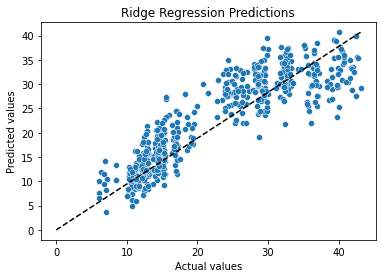

In [45]:
import seaborn as sns

# Predict target values
predicted = model_ri.predict(predictors)

# Create scatter plot of predicted vs actual values
sns.scatterplot(x=target, y=predicted)
plt.plot([0, np.max(target)], [0, np.max(predicted)], 'k--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression Predictions')
plt.show()

In [46]:
##Commenting this part of the code as i have used it for analysis part
# Optimized Ridge Regression model with Crossvalidation for Train Dataset

In [47]:
'''The cross_val_score function is used to perform cross-validation on the Ridge Regression model. The model_ri object created earlier is used as the model to cross-validate.

The n_jobs parameter is set to -1 to use all available processors for parallel processing.

The scoring parameter is set to "neg_mean_squared_error", which means that the negative mean squared error is used as the scoring metric for cross-validation. The negative of mean squared error is used because scikit-learn's cross-validation functions require a scoring metric that is maximized, while mean squared error needs to be minimized.

The resulting Rid_scores array contains the negative mean squared error scores for each fold.

The np.sqrt function is used to take the square root of each negative mean squared error score to get the RMSE scores.

The np.mean function is used to calculate the mean of the RMSE scores.

Finally, the average RMSE score is printed rounded to two decimal places.
'''

'The cross_val_score function is used to perform cross-validation on the Ridge Regression model. The model_ri object created earlier is used as the model to cross-validate.\n\nThe n_jobs parameter is set to -1 to use all available processors for parallel processing.\n\nThe scoring parameter is set to "neg_mean_squared_error", which means that the negative mean squared error is used as the scoring metric for cross-validation. The negative of mean squared error is used because scikit-learn\'s cross-validation functions require a scoring metric that is maximized, while mean squared error needs to be minimized.\n\nThe resulting Rid_scores array contains the negative mean squared error scores for each fold.\n\nThe np.sqrt function is used to take the square root of each negative mean squared error score to get the RMSE scores.\n\nThe np.mean function is used to calculate the mean of the RMSE scores.\n\nFinally, the average RMSE score is printed rounded to two decimal places.\n'

In [48]:
'''# Import cross_val_score function from model_selection module of scikit-learn library
from sklearn.model_selection import cross_val_score
import math

## Create Ridge Regression model object with 5 cross-validation folds
# Use the Ridge Regression model object created earlier (model_ri) with alpha=3 and Cholesky solver
# Use 5 cross-validation folds and scoring metric of negative mean squared error
# Use all available processors for parallel processing with n_jobs=-1
Rid_scores = cross_val_score(model_ri, predictors, target,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=5)

# Take the square root of the negative mean squared error scores to get the RMSE scores
Rid_rmse_scores = np.sqrt(-Rid_scores)

# Calculate the mean of the RMSE scores
Rid_rmse_mean = np.mean(Rid_rmse_scores)

###################################################
#Root mean squared error
###################################################

# Print the average RMSE score rounded to two decimal places
print("Average RMSE: {:.2f}".format(Rid_rmse_mean))
'''

'# Import cross_val_score function from model_selection module of scikit-learn library\nfrom sklearn.model_selection import cross_val_score\nimport math\n\n## Create Ridge Regression model object with 5 cross-validation folds\n# Use the Ridge Regression model object created earlier (model_ri) with alpha=3 and Cholesky solver\n# Use 5 cross-validation folds and scoring metric of negative mean squared error\n# Use all available processors for parallel processing with n_jobs=-1\nRid_scores = cross_val_score(model_ri, predictors, target,\n                             n_jobs=-1, scoring="neg_mean_squared_error", cv=5)\n\n# Take the square root of the negative mean squared error scores to get the RMSE scores\nRid_rmse_scores = np.sqrt(-Rid_scores)\n\n# Calculate the mean of the RMSE scores\nRid_rmse_mean = np.mean(Rid_rmse_scores)\n\n###################################################\n#Root mean squared error\n###################################################\n\n# Print the average RMSE s

# ElasticNet Regression

The purpose of this code is to define and train an Elastic Net Regression model.
The ElasticNet class is imported from the linear_model module of scikit-learn library.
The model_ela object is created by instantiating the ElasticNet class with specified hyperparameters alpha and l1_ratio.
The alpha hyperparameter controls the strength of the regularization, with higher values of alpha corresponding to stronger regularization.
The l1_ratio hyperparameter controls the balance between L1 and L2 regularization. When l1_ratio is 0, Elastic Net reduces to Ridge Regression. When l1_ratio is 1, Elastic Net reduces to Lasso Regression.
The model_ela object is trained on the predictors and target data using the fit method.

In [49]:
# Import ElasticNet class from linear_model module of scikit-learn library
from sklearn.linear_model import ElasticNet

# Define the Elastic Net Regression model
model_ela = ElasticNet(alpha=0.5, l1_ratio=0.5)


# Train the model on the training set
model_ela.fit(predictors, target)

ElasticNet(alpha=0.5)

In [50]:
model_ela = ElasticNet().fit(predictors, target)

In [51]:
# Print the intercept of the ElasticNet regression model
print(f"intercept: {model_ela.intercept_}")

# Print the coefficients (slopes) of the ElasticNet regression model
print(f"slope: {model_ela.coef_}")

intercept: 22.05050279329609
slope: [ 0.31996164 -0.83173772  1.13029769 -2.52663748  3.18705248 -0.
  1.50768235  0.         -0.         -0.          0.        ]


# Optimized ElasticNet Regression model with Crossvalidation for Train Dataset

The purpose of this code is to evaluate the performance of the Elastic Net Regression model that was defined and trained earlier.

The cross_val_score function is used to perform 5-fold cross-validation on the trained model_ela object. The n_jobs parameter is set to -1 to use all available CPU cores for parallel computation. The scoring parameter is set to "neg_mean_squared_error" to use the negative mean squared error as the evaluation metric.

The negative mean squared error scores are then converted to root mean squared error scores using the np.sqrt function, and the mean root mean squared error score is calculated across all folds using the np.mean function.

Finally, the average RMSE score is printed rounded to two decimal places using the print function.

In [52]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
import math

## Create with 5 cross-validation folds

Ela_scores = cross_val_score(model_ela, predictors, target,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=5)
# Calculate the root mean squared error scores from the negative mean squared error scores
Ela_rmse_scores = np.sqrt(-Ela_scores)
# Calculate the mean root mean squared error score across all folds
Ela_rmse_mean = np.mean(Ela_rmse_scores)

###################################################
#Root mean squared error
###################################################

print("Average RMSE: {:.2f}".format(Ela_rmse_mean))

Average RMSE: 5.28


The below code creates a scatter plot with actual target values on the x-axis and predicted target values on the y-axis. The scatter plot is created using seaborn library. The predicted values are obtained using the ElasticNet Regression model trained earlier. The code also adds a black dashed line to represent a perfect prediction where actual and predicted values are equal.

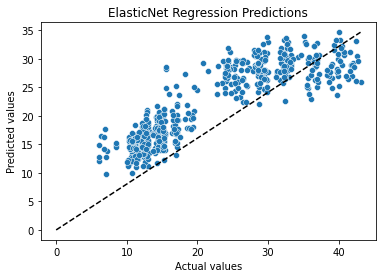

In [53]:
import seaborn as sns

# Predict target values
predicted = model_ela.predict(predictors)

# Create scatter plot of predicted vs actual values
sns.scatterplot(x=target, y=predicted)
plt.plot([0, np.max(target)], [0, np.max(predicted)], 'k--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('ElasticNet Regression Predictions')
plt.show()

# Comparison and find the top 2 Best models for Training Data set

This code defines a dictionary models with the RMSE values of different regression models as its values. The models included in the dictionary are Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression.

The RMSE values of the models are printed using a for loop.

Then, the top two models with the smallest RMSE values are identified using the heapq.nsmallest() function and printed.

In [54]:
import heapq

models = {'Linear Regression': lin_rmse_mean,
          'Lasso Regression': lsgrid_search.best_score_,
        #  'Polynomial Regression': Poly_rmse_mean,
          'Ridge Regression': ridge_grid_search.best_score_,
          'Elastic Net Regression': Ela_rmse_mean}

# Print the RMSE values for all the models
for model, rmse in models.items():
    print(f"{model}: {rmse:.2f}")

# Find the top two models with the smallest RMSE values
top_two_models = heapq.nsmallest(2, models, key=models.get)
print(f"\nTop two models with the smallest RMSE values: {', '.join(top_two_models)}")


Linear Regression: 4.62
Lasso Regression: 0.79
Ridge Regression: 0.78
Elastic Net Regression: 5.28

Top two models with the smallest RMSE values: Ridge Regression, Lasso Regression


# Explanation and Visualization of RMSE Values of Different Models

The code creates a bar chart to visualize the root mean squared error (RMSE) values of different regression models. The RMSE values of the different models are stored in the dictionary models, where the key is the name of the model and the value is the corresponding RMSE value. The code uses the sns (seaborn) library to set the style of the plot and to define the color palette.

The plt.bar() function is used to create a vertical bar chart with the models.keys() as the x-axis and the models.values() as the y-axis. The plt.title() function is used to set the title of the plot, while the plt.xlabel() and plt.ylabel() functions are used to label the x-axis and y-axis, respectively. The plt.xticks() and plt.yticks() functions are used to set the font size of the x-axis and y-axis labels, respectively. The plt.tight_layout() function is used to adjust the spacing of the plot, and the plt.show() function is used to display the plot.

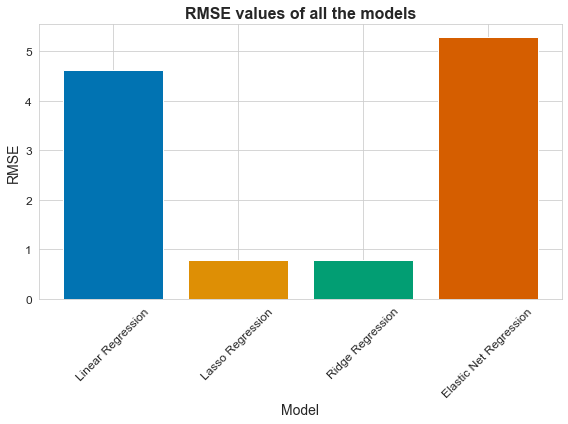

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

models = {'Linear Regression': lin_rmse_mean,
          'Lasso Regression': lsgrid_search.best_score_,
         #'Polynomial Regression': Poly_rmse_mean,
          'Ridge Regression': ridge_grid_search.best_score_,
          'Elastic Net Regression': Ela_rmse_mean}

# Create a bar chart to visualize the RMSE values of all the models
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), models.values(), color=sns.color_palette("colorblind"))
plt.title('RMSE values of all the models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


From the above bar chart to determine which is the best model is done through the RMSE values. The model which is having the lowest RMSE value is generally considered the best because it has the smallest average difference between the predicted and the actual values. 

In the code snippet I provided earlier, the top two models with the smallest RMSE values were already printed. To determine which of these two models is the best, you can look at the corresponding bars in the bar chart. The model with the smaller bar is the best.

# Test_Set Analysis

In [56]:
#Shows the test set data
test_set

X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
668  C2  0.68  800.42  444.68  242.55  3.47  1.98  0.32  3.63  16.47
324  C2  0.59  683.55  350.35  242.55  3.47  2.42  0.25  0.90  13.17
624  C2  0.97  509.36  291.06  121.28  5.67  1.62  0.32  2.70  32.82
690  C2  0.64  700.70  339.57  161.70  6.93  3.96  0.40  3.60  41.32
473  C1  0.77  776.16     NaN  266.80  3.47  2.97  0.25  4.40  16.69
..   ..   ...     ...     ...     ...   ...   ...   ...   ...    ...
619  C3  0.58  776.16  377.30  198.45  3.85  4.95  0.48  1.98  19.12
198  C1  0.89  507.15  318.50  148.23  6.30  4.40  0.11  3.96  28.86
538  C2  0.69  529.20  291.06  161.70  6.93  3.24  0.32  0.90  32.09
329  C2  0.63  776.16  308.70  218.30  3.47  2.97  0.31  0.99  17.35
302  C3  0.90  496.12  318.50  132.30  7.70  3.60  0.24  1.21  26.97

[231 rows x 10 columns]

# Inspection and visualization of data for Test set

In [57]:
#calculates the number of missing values for each variable in the 'test_set' dataset

test_set.isnull().sum()


X0     0
X1     0
X2     0
X3    14
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

In [58]:
#displays the first five rows of the 'test_set' dataset

test_set.head()


X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
668  C2  0.68  800.42  444.68  242.55  3.47  1.98  0.32  3.63  16.47
324  C2  0.59  683.55  350.35  242.55  3.47  2.42  0.25  0.90  13.17
624  C2  0.97  509.36  291.06  121.28  5.67  1.62  0.32  2.70  32.82
690  C2  0.64  700.70  339.57  161.70  6.93  3.96  0.40  3.60  41.32
473  C1  0.77  776.16     NaN  266.80  3.47  2.97  0.25  4.40  16.69

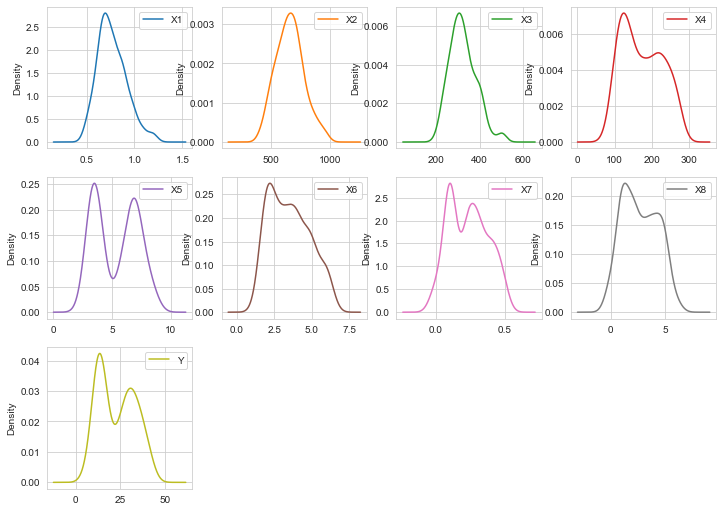

In [59]:
#densityPlot for test_set
test_set.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

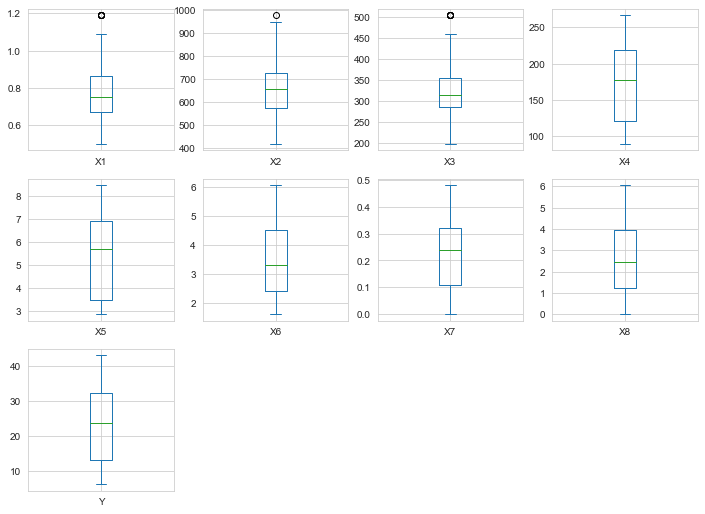

In [60]:
#boxplot for test_set
test_set.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

Generating histograms for the characteristics that holds the test set data for each feature in the dataset

C:\Users\Swaru\AppData\Local\Temp\ipykernel_51096\1325814989.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



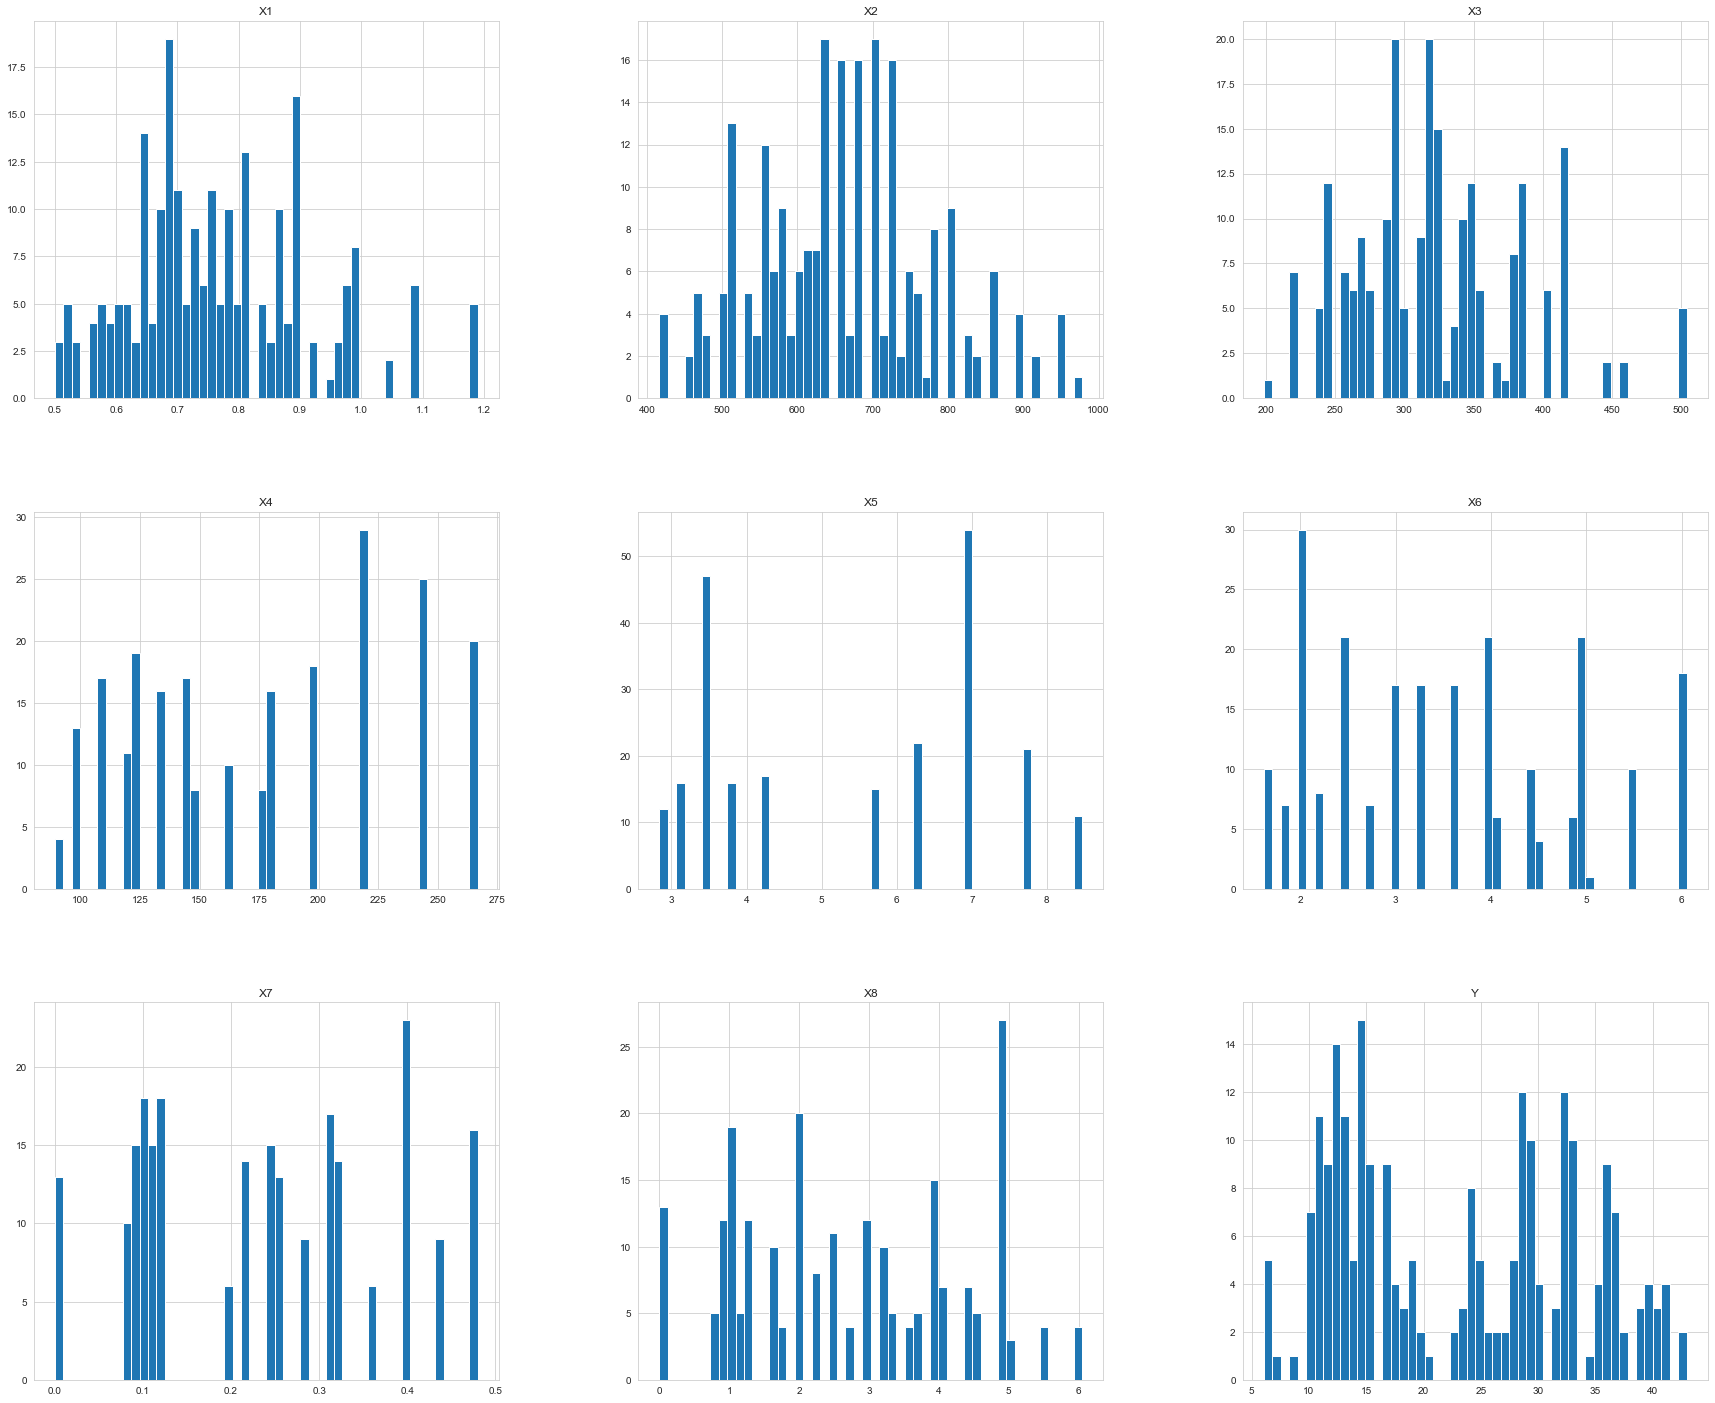

In [61]:
fig, ax = plt.subplots(figsize=(30,25))
test_set.hist(bins=50, ax=ax)
plt.savefig("Histogram plots")
plt.show()

# In addition to data cleaning and pre-processing, data transformation is also necessary

In [62]:
#The code returns the first few rows of the test_set DataFrame that have missing values in any column.

test_set[test_set.isnull().any(axis=1)].head()

X0    X1      X2  X3      X4    X5    X6    X7    X8      Y
473  C1  0.77  776.16 NaN  266.80  3.47  2.97  0.25  4.40  16.69
328  C3  0.77  862.40 NaN  218.30  4.24  2.42  0.31  0.99  17.50
629  C3  0.73  557.86 NaN  121.28  6.93  3.63  0.40  3.30  34.95
764  C2  0.50  727.65 NaN  266.80  3.47  1.98  0.44  5.00  16.54
362  C3  0.74  686.00 NaN  218.30  3.15  3.96  0.31  2.20  12.16

In [63]:
test_set.head()

X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
668  C2  0.68  800.42  444.68  242.55  3.47  1.98  0.32  3.63  16.47
324  C2  0.59  683.55  350.35  242.55  3.47  2.42  0.25  0.90  13.17
624  C2  0.97  509.36  291.06  121.28  5.67  1.62  0.32  2.70  32.82
690  C2  0.64  700.70  339.57  161.70  6.93  3.96  0.40  3.60  41.32
473  C1  0.77  776.16     NaN  266.80  3.47  2.97  0.25  4.40  16.69

In [64]:
test_set_num1= test_set.drop(['Y','X0'], axis = 1)


# Transformation Pipelines


The code below creates a transformation pipeline to process numerical data in machine learning. The pipeline contains two transformers: SimpleImputer and StandardScaler.

The SimpleImputer transformer is used to replace missing values in the data with the median of the available data. This is specified in the pipeline by setting the strategy parameter to "median".

The StandardScaler transformer is used to standardize the numerical data by scaling it to have a mean of zero and a variance of one. This is useful to ensure that all features are on the same scale, which can improve the performance of some machine learning algorithms.

The num_pipeline is created using the Pipeline class from the sklearn.pipeline module. This class allows us to combine multiple transformers into a single pipeline, making it easier to apply the same transformations to multiple datasets. The transformers are defined as a list of tuples, where each tuple contains a name for the transformer and an instance of the transformer.

The fit_transform method is then called on the num_pipeline object to fit the transformers to the training data and apply the transformations to both the training and testing data. The resulting transformed data is then stored in the test_num_tr variable.

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
test_num_tr = num_pipeline.fit_transform(test_set_num1)

The below code is creating a ColumnTransformer object that applies two different transformations to the input data, one for numerical features and another for categorical features.
The first step is to define the list of numerical attributes (num_attribs1) and categorical attributes (cat_attribs1) in the input data. Next, a full_pipeline1 object is created, which is a ColumnTransformer that applies a numerical transformation pipeline (defined earlier as num_pipeline) to the numerical attributes and a one-hot encoding transformation to the categorical attribute. Finally, the full_pipeline1 object is applied to the input data test_set using the transform() method to obtain the transformed data in a pandas DataFrame format called test_prepared.

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs1 = list(train_set_num1)
cat_attribs1 = ["X0"]

full_pipeline1 = ColumnTransformer([
        ("num", num_pipeline, num_attribs1),
        ("cat", OneHotEncoder(), cat_attribs1),
    ])

#test_prepared = pd.DataFrame(full_pipeline1.fit_transform(test_set))
test_prepared= pd.DataFrame(full_pipeline.transform(test_set))
test_prepared

0         1         2         3         4         5         6   \
0   -0.557440  1.070996  2.127302  1.290728 -0.921532 -1.280331  0.574003   
1   -1.170714  0.114967  0.518792  1.290728 -0.921532 -0.916371  0.076039   
2    1.418662 -1.309955 -0.492217 -1.126537  0.264116 -1.578117  0.574003   
3   -0.830006  0.255259  0.334972 -0.320848  0.943170  0.357491  1.143105   
4    0.055833  0.872543 -0.078537  1.774101 -0.921532 -0.461420  0.076039   
..        ...       ...       ...       ...       ...       ...       ...   
226 -1.238855  0.872543  0.978342  0.411686 -0.716738  1.176402  1.712207   
227  0.873531 -1.328034 -0.024312 -0.589345  0.603643  0.721451 -0.919889   
228 -0.489299 -1.147659 -0.492217 -0.320848  0.943170 -0.238081  0.574003   
229 -0.898148  0.872543 -0.191421  0.807355 -0.921532 -0.461420  0.502865   
230  0.941672 -1.418262 -0.024312 -0.906876  1.358147  0.059705  0.004901   

           7    8    9    10  
0    0.489514  0.0  1.0  0.0  
1   -1.219624  0.0  1.0  0.0  
2   -0.092720  0.0  1.0  0.0  
3    0.470733  0.0  1.0  0.0  
4    0.971579  1.0  0.0  0.0  
..        ...  ...  ...  ...  
226 -0.543481  0.0  0.0  1.0  
227  0.696114  1.0  0.0  0.0  
228 -1.219624  0.0  1.0  0.0  
229 -1.163279  0.0  1.0  0.0  
230 -1.025546  0.0  0.0  1.0  

[231 rows x 11 columns]

In [67]:
# Assign the transformed data to the predictors variable
predictors1=test_prepared

# Assign the target variable to the 'Y' column of the test_set DataFrame
target1=test_set['Y']
# Display the target variable
target1

668    16.47
324    13.17
624    32.82
690    41.32
473    16.69
       ...  
619    19.12
198    28.86
538    32.09
329    17.35
302    26.97
Name: Y, Length: 231, dtype: float64

# Models

After analyzing the training dataset, it was discovered that Lasso Regression and Ridge Regression produced the smallest RMSE value. Therefore, the next step is to conduct an analysis of the test dataset using these two models.

# Ridge Regression Model on Test Dataset

In [68]:
# Import Ridge and RidgeCV classes from linear_model module of scikit-learn library
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors1, target1, test_size=0.2, random_state=42)

# Create a Ridge Regression model object with a regularization parameter (alpha) of 3 and Cholesky solver
model_ri_test = Ridge(alpha=3, solver="cholesky")

# Fit the model to the training data
model_ri_test.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_ri_test.predict(X_test)

# Calculate the RMSE value
rmse_ri = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_ri)


RMSE: 4.312635491164663


In [69]:
# Print the intercept of the Ridge regression model
print(f"intercept: {model_ri_test.intercept_}")

# Print the coefficients (slopes) of the Ridge regression model
print(f"slope: {model_ri_test.coef_}")

intercept: 22.277968481072893
slope: [-0.49188689  0.04927048  1.67093638 -3.26652028  5.56930565 -0.22684966
  2.78699394  0.56246957  0.07688058 -0.54860273  0.47172215]


# Lasso Regression on Test Dataset

This code imports the Lasso class from the linear_model module of scikit-learn, splits the data into training and testing sets using train_test_split, creates a Lasso Regression model object with default parameters, fits the model to the training data, makes predictions on the test data, and calculates the RMSE value.

In [70]:
from sklearn.linear_model import Lasso


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors1, target1, test_size=0.2, random_state=42)


# Create a Lasso Regression model object with default parameters
model_ls_test = Lasso()

# Fit the model to the training data
model_ls_test.fit(predictors1, target1)

# Make predictions on the test data
y_pred = model_ls_test.predict(X_test)

# Calculate the RMSE value
rmse_la = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_la)

RMSE: 4.7589242452517455


In [71]:
# Print the intercept of the Lasso regression model
print(f"intercept: {model_ls_test.intercept_}")

# Print the coefficients (slopes) of the Lasso regression model
print(f"slope: {model_ls_test.coef_}")

intercept: 22.252967022245116
slope: [ 0.         -0.          0.81849794 -2.21701202  5.47441127 -0.
  1.72615462  0.          0.         -0.          0.        ]


# Comparison and find the Best model for Test Data set

This code defines a dictionary named "models1" which contains the names of different regression models (Lasso, Ridge) and their corresponding RMSE values. It then prints the RMSE values for all the models. Finally, it uses the "heapq.nsmallest" function from the heapq module to find the top model with the smallest RMSE value and prints its name. Note that the function takes three arguments: the number of top elements to return, the dictionary to search for the elements, and the key to use for comparison. In this case, we want to find the model with the smallest RMSE, so we use the "key=models.get" argument to specify that the comparison should be based on the values of the dictionary.

In [72]:
import heapq

models1 = {#'Linear Regression': Lr_rmse_mean1,
          'Lasso Regression': rmse_la,
          #'Polynomial Regression': Poly_rmse_mean1}
          'Ridge Regression': rmse_ri}
          #'Elastic Net Regression': Ela_rmse_mean}

# Print the RMSE values for all the models
for model1, rmse in models1.items():
    print(f"{model1}: {rmse:.2f}")

# Find the top two models with the smallest RMSE values
top_model = heapq.nsmallest(1, models1, key=models.get)
print(f"\nTop model with the smallest RMSE values: {', '.join(top_model)}")


Lasso Regression: 4.76
Ridge Regression: 4.31

Top model with the smallest RMSE values: Ridge Regression


# Explanation and Visualization of RMSE Values of Best Models on Test Data


Code for creating a bar chart to visualize the RMSE values of the models on the test set. The models considered here are Lasso Regression and Ridge Regression.

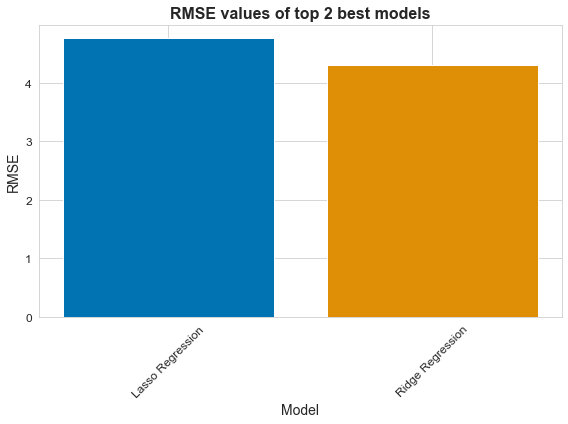

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

models1 = {#'Linear Regression': Lr_rmse_mean1,
          'Lasso Regression': rmse_la,
          #'Polynomial Regression': Poly_rmse_mean1}
          'Ridge Regression':rmse_ri}
          #'Elastic Net Regression': Ela_rmse_mean}

# Create a bar chart to visualize the RMSE values of all the models
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(models1.keys(), models1.values(), color=sns.color_palette("colorblind"))
plt.title('RMSE values of top 2 best models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Conclusion

The project involved testing four different regression models, including Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression. The data was first applied to the train dataset, and it was found that the top two models were Lasso Regression with an RMSE value of 0.79 and Ridge Regression with an RMSE value of 0.78.

Afterward, the study opted for Ridge Regression and Lasso Regression, which were then applied to the test dataset. The results showed that Ridge Regression had an RMSE value of 4.31, while Lasso Regression had an RMSE value of 4.76. This indicates that Ridge Regression is the best model, both for the train dataset and the test dataset.

In conclusion, the study found that Ridge Regression is the most suitable regression model for the given dataset, as it provided the most accurate predictions on both the train and test datasets. Also the RMSE values for both in the test set and training set suggest that the models can relatively predict the data accurately.


# References

* https://medium.com/geekculture/how-to-handle-categorical-variables-7c1ee198c55c
* Book: Deep Learning with python
* Book: An Introduction to Statistical Learning: with Applications in R
* [HoML] Aurelian Geron, Hands-on Machine Learning with Schikit-Learn, Keras and TensorFlow, O'Reilly, 2019
* Machine Learning lectures and Labs
* https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regularization
* https://scikit-learn.org/stable/modules/linear_model.html#lasso
* https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV